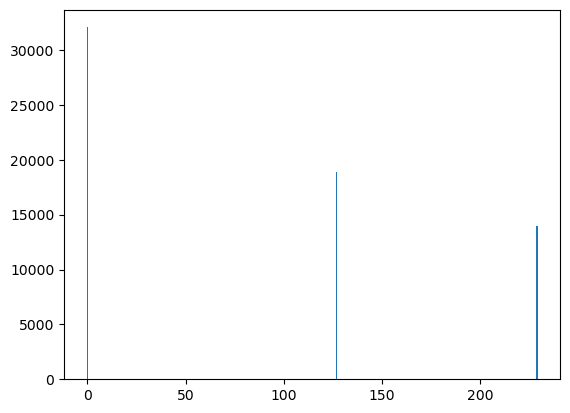

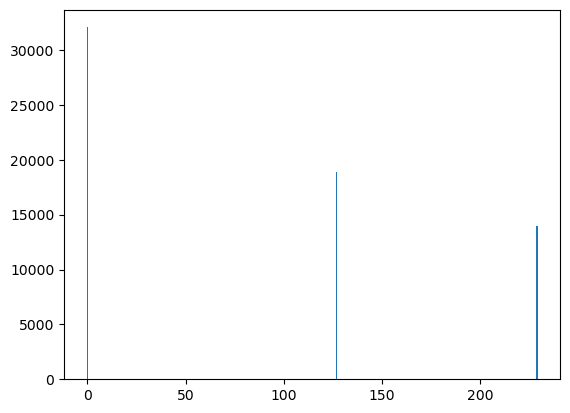

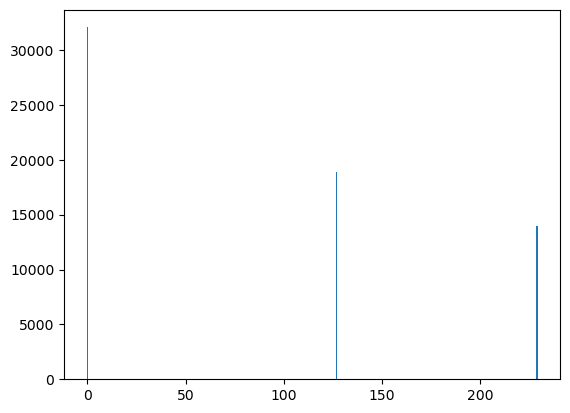

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('./images/test_pattern.tif')
def hist_values(img):
    red = []
    green = []
    blue = []
    
    shape = img.shape
    for j in range (shape[0]):
        for k in range(shape[1]):
            r,g,b = img[j, k]
            red.append(r)
            green.append(g)
            blue.append(b)
    keysRed, countRed = np.unique(red, return_counts = True)
    keysGreen, countGreen = np.unique(green, return_counts = True)
    keysBlue, countBlue = np.unique(blue, return_counts = True)
    
    return keysRed, countRed, keysGreen, countGreen, keysBlue, countBlue
    
    

(keysRed, countRed, keysGreen, countGreen, keysBlue, countBlue) = hist_values(image)
plt.bar(keysRed, countRed)
plt.show()
plt.bar(keysGreen, countGreen)
plt.show()
plt.bar(keysBlue, countBlue)
plt.show()

In [37]:
print('Image size',image.size)
np.sum(countRed + countGreen + countBlue)

Image size 196608


196608

In [48]:
samples = np.random.normal(0,20, image.shape)
samples.shape

(256, 256, 3)

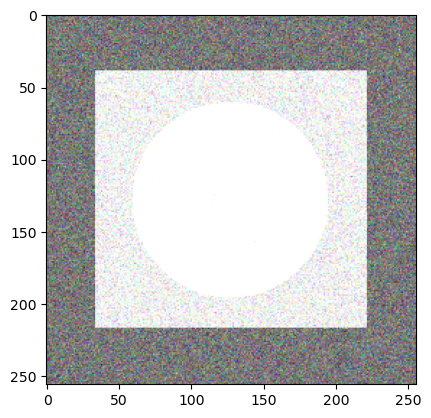

In [51]:
# normalized output
import cv2
img_norm = cv2.normalize(samples, None, 0, 255, cv2.NORM_MINMAX)
noisy_image = cv2.add(image, img_norm, dtype=cv2.CV_8U)

normalized_img=noisy_image.astype(np.uint8)
plt.imshow(normalized_img, cmap='gray')
plt.show()

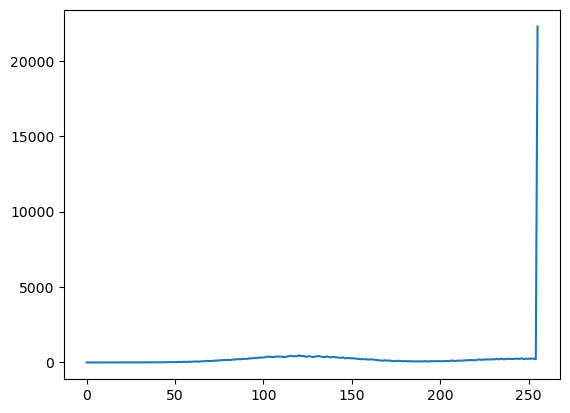

In [52]:
# Calculate the histogram
hist = cv2.calcHist([noisy_image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist)
plt.show()